In [ ]:
#Datos
import pandas as pd

#Plots
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# Cargo el data set
direc = "/content/gdrive/MyDrive/TP2/train.csv"
direc_test = "https://raw.githubusercontent.com/Akselas/7506R-1C2023-GRUPO26/main/TP2/test.csv"

Mounted at /content/gdrive


#Preprocesamiento

In [ ]:
import numpy as np
import random
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten
random.seed(1)
np.random.seed(1)

import nltk

data_test = pd.read_csv(direc_test)
data_train = pd.read_csv(direc)

reviews_test = data_test['review_es']
reviews_train = data_train['review_es']
sentiments_train = data_train['sentimiento']

#Aplico stemming al dataset

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# Definir una función para aplicar stemming a un texto
def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)



reviews_train_stemmed = reviews_train.apply(apply_stemming)
reviews_train_stemmed

0        uno de lo otro crítico ha mencionado que despu...
1        una pequeña pequeña producción.la técnica de f...
2        pensé que esta era una manera maravillosa de p...
3        básicamente, hay una familia dond un niño pequ...
4        el "amor en el tiempo" de petter mattei es una...
                               ...                        
49995    pensé que esta película hizo un buen trabajo a...
49996    mala parcela, mal diálogo, mala actuación, dir...
49997    soy católica enseñada en escuela primaria parr...
49998    voy a tener que estar en desacuerdo con el com...
49999    nadi espera que la película de star trek sean ...
Name: review_es, Length: 50000, dtype: object

In [ ]:
reviews_test_stemmed = reviews_test.apply(apply_stemming)

In [ ]:
reviews_test_stemmed[0]

'la mayor virtud de esta película es su existencia.el hecho de que podamo jugar con lo tópico má extremo de la identidad patria (la andaluza y la vasca) sin que nadi se escandalic ni ponga el grito en el cielo, indica mucho de nuestra madurez como nación (pese a quien pese). bueno, corrijo: el hecho de que podamo jugar y hacer mofa y befa de lo tópico sobr lo vasco y el nacionalismo vasco, sin que nadi se escandalic ni ponga el grito en el cielo, indica mucho del grado de normalización de cierta cuestion que ant eran llaga abierta siempr dispuesta a sangrar. y hago esta corrección, porqu lo andaluc han sido motivo de guasa siempr y nunca ha pasado nada.por esto mismo, el planteamiento de "ocho apellido vascos" es valiente, es oportuno y es oportunista. segurament sea esa una de la principal razon por la que lo español hemo acudido en masa, en una masa casi sin precedentes, a lo cine a ver est producto patrocinado por tele 5. esa junto con la acertada fecha de estreno (entr lo oscar y l

In [ ]:
reviews_train_stemmed[0]

'uno de lo otro crítico ha mencionado que despué de ver solo 1 oz episodio, estará enganchado. tienen razón, ya que esto es exactament lo que sucedió conmigo. la primera cosa que me golpeó sobr oz fue su brutalidad y su escena de violencia inconfiadas, que se encuentran a la derecha de la palabra. confía en mí, est no es un espectáculo para lo débile de corazón o tímido. est espectáculo no extra punzon con respecto a la drogas, el sexo o la violencia. es hardcore, en el uso clásico de la palabra. se llama oz, ya que es el apodo dado al penitenciario del estado de seguridad máximo de oswald. se centra principalment en la ciudad de emeralda, una sección experiment de la prisión dond toda la célula tienen frent de vidrio y se enfrentan hacia adentro, por lo que la privacidad no es alta en la agenda. em citi es el hogar de mucho ... fariarios, musulmanes, gangstas, latinos, cristianos, italianos, irlandes y má ... así que la esposas, la mirada de muerte, la relacion peligrosa y lo acuerdo 

In [ ]:
#Tokenizo el dataset, tomando como maximo una cierta cantidad de feautures
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = CountVectorizer(min_df=0.001,max_features=10000)
matriz_reviews = vectorizer.fit_transform(reviews_train_stemmed)

In [ ]:
len(vectorizer.vocabulary_)

10000

In [ ]:
labels_train = sentiments_train.replace({'positivo': 1, 'negativo': 0})

x_train, x_test, y_train, y_test = train_test_split(matriz_reviews,labels_train, test_size=0.30, random_state=0)



#Preparacion y entrenamiento del modelo

In [ ]:
#preparacion del modelo
model = Sequential()
model.add(Embedding(10000, 200, input_length=10000))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10000, 200)        2000000   
                                                                 
 flatten (Flatten)           (None, 2000000)           0         
                                                                 
 dense (Dense)               (None, 1)                 2000001   
                                                                 
Total params: 4,000,001
Trainable params: 4,000,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo = model.fit(x_train.toarray(), y_train, epochs=3, batch_size=500)

Epoch 1/3
70/70 [==============================] - 488s 7s/step - loss: 4.1890 - acc: 0.5535
Epoch 2/3
70/70 [==============================] - 484s 7s/step - loss: 0.4308 - acc: 0.8083
Epoch 3/3
70/70 [==============================] - 473s 7s/step - loss: 0.2857 - acc: 0.8839


In [ ]:
# Predecir las probabilidades para los datos de entrenamiento
y_prob_test = model.predict(x_test.toarray())


469/469 [==============================] - 79s 168ms/step


In [ ]:
y_prob_test[0:20]

array([[7.7640396e-01],
       [5.3065794e-04],
       [8.9191192e-01],
       [6.5544659e-01],
       [9.8195547e-01],
       [6.4670587e-01],
       [9.4698828e-01],
       [3.4956667e-01],
       [1.2003825e-01],
       [2.2593360e-01],
       [2.2220092e-01],
       [4.2649573e-03],
       [1.2580299e-02],
       [2.6509743e-02],
       [4.2711160e-01],
       [6.1712915e-01],
       [9.8994517e-01],
       [6.8991178e-01],
       [9.2478418e-01],
       [7.9485495e-03]], dtype=float32)

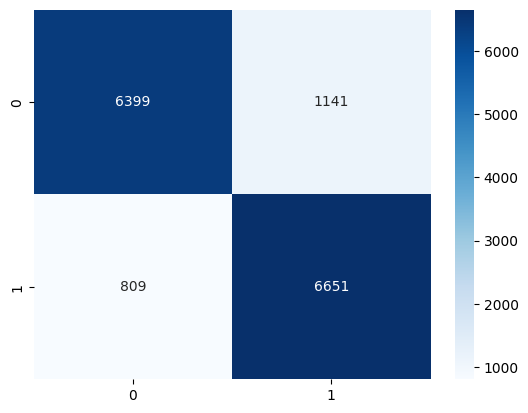

F1-score: 0.8721479150275375


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_test = np.where(y_prob_test>0.6,1,0)

ds_validacion=pd.DataFrame(y_pred_test,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

## # Calcular la matriz de confusión
cm_train = confusion_matrix(ds_validacion.y_pred, ds_validacion.y_real)


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

# # Agregar etiquetas a los ejes
# plt.xlabel('Predicted')
# plt.ylabel('True')

# # Mostrar el gráfico
plt.show()


f1 = f1_score(ds_validacion.y_real,ds_validacion.y_pred)

# # Imprimir el F1-score
print("F1-score:", f1)

#prediccion


In [ ]:
test_id = data_test.ID.copy()

In [ ]:
matriz_prediccion =  vectorizer.transform(reviews_test_stemmed)

In [ ]:
matriz_prediccion[12].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_predict_valid = model.predict(matriz_prediccion.toarray())
y_pred_test_valid = np.where(y_predict_valid>0.6,1,0)

submit =  pd.DataFrame(zip(test_id,y_pred_test_valid),columns=['ID','sentimiento'])


269/269 [==============================] - 58s 214ms/step


In [ ]:
submit['sentimiento'] = submit['sentimiento'].astype(int)
submit

,ID,sentimiento
0,60000,0
1,60001,0
2,60002,0
3,60003,1
4,60004,0
...,...,...
8594,68594,1
8595,68595,0
8596,68596,1
8597,68597,0


In [ ]:
submit["sentimiento"] = submit["sentimiento"].apply(lambda sentimiento: 'negativo' if sentimiento == 0 else 'positivo')
submit.head(20)

,ID,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,positivo
4,60004,negativo
5,60005,positivo
6,60006,negativo
7,60007,negativo
8,60008,negativo
9,60009,negativo


In [ ]:
submit.to_csv('./neural_network_submit12.csv',index=False)

#Generacion de modelo

In [ ]:
import keras

In [ ]:
model.save("modelo_best_red_tp2.h5")

In [ ]:
nuevo_modelo = keras.models.load_model("modelo_best_red_tp2.h5")
a = nuevo_modelo.predict(x_test.toarray())

469/469 [==============================] - 91s 192ms/step


##Metrica de presicion y recall

In [ ]:
y_pred_test = np.where(a>0.6,1,0)

ds_validacion=pd.DataFrame(y_pred_test,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,f1_score, confusion_matrix, classification_report
print(classification_report(ds_validacion.y_real, ds_validacion.y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7208
           1       0.89      0.85      0.87      7792

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

